### Name: Preeti Jawalkar
Task 1 Prediction Using supervised ML


Computer vision and IoT intern at GRIP 


### __Task 1:__ 

 - Predict the percentage of a student based on the no. of study hours using Supervised Learning. 
 - Dataset : http://bit.ly/w-data

### Import the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load the Dataset

In [2]:
df= pd.read_csv('http://bit.ly/w-data')
df.head(8)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60


### Data Preperation

In [3]:
## Check for null values.
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

There are no null values.

In [4]:
## Check for categorical values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


There are no categorical values.

In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Visualizing the dataset

Text(0.5, 1.0, 'Correlation between the data')

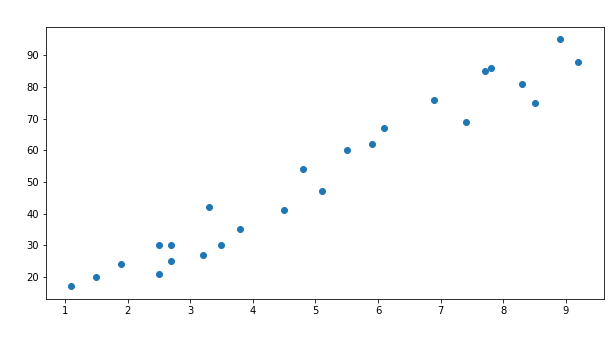

In [6]:
plt.figure(figsize=(10,5))
plt.scatter(df['Hours'],df['Scores'])
plt.xlabel('Hours', color='white', fontsize=15)
plt.ylabel('Scores', color='white', fontsize=15)
plt.title('Correlation between the data', fontsize=18, color='white')

From the above graph, it is evident that Hours and Scores share a positive linear relation. Plotting the regression line:

Text(0, 0.5, 'Scores')

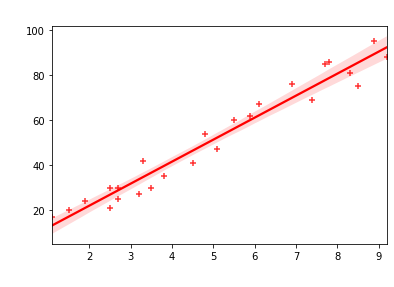

In [7]:
sns.regplot(x='Hours',y='Scores', data=df, marker='+', color='red')
plt.title("Hours vs Scores", color='white', fontsize=18)
plt.xlabel('Hours',fontsize=15, color='white')
plt.ylabel('Scores',fontsize=15, color='white')

Thus, we will build our model using Linear Regression.

### Train-Test Split

In [8]:
## Seperating the feature column from the target variable.
X= df.iloc[ :, : 1].to_numpy()
Y= df.iloc[ :, 1:].to_numpy()

In [9]:
## Splitting the data into training and testing sets.
from sklearn.model_selection import train_test_split
X_train,x_test,Y_train,y_test= train_test_split(X,Y, test_size=0.2, random_state=0)

### Model Training

In [10]:
from sklearn.linear_model import LinearRegression
regr= LinearRegression()
regr.fit(X_train,Y_train)
print('Training complete.')

Training complete.


### Prediction

Now that the model training is complete, we proceed to make predictions on the test set.

In [11]:
y_pred= regr.predict(x_test)
y_pred

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

In [12]:
## Comparing the actual and predicted values.
df_pred=pd.DataFrame({'Actual': [i[0] for i in y_test], 'Predicted': [i[0] for i in y_pred]})
df_pred

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


Plotting the predicted values against the original values:

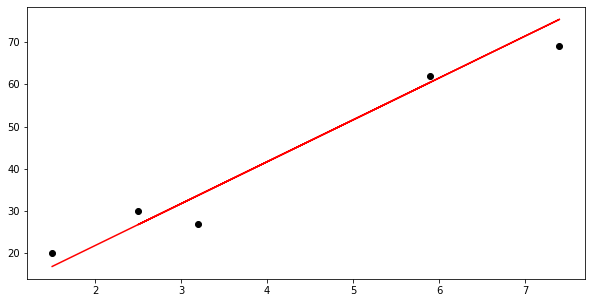

In [13]:
plt.figure(figsize=(10,5))
plt.scatter(x_test,y_test,color='black')
plt.plot(x_test,y_pred, color='red')

### Model Evaluation

Here, performance of the algorithm has been calculated using Mean Absolute Error and Root Mean Squared Error.

In [14]:
from sklearn import metrics
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,y_pred))
print('Root Mean Squared Error Error: ',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error:  4.183859899002982
Root Mean Squared Error Error:  4.647447612100373


Evaluating against given number of hours: 9.25 hrs/day:

In [15]:
pred_score= regr.predict([[9.25]])  ## Reshaped to 2-D array.
print('The predicted score for a student who studies for 9.25 hours/day will be ', round(pred_score[0][0],3))

The predicted score for a student who studies for 9.25 hours/day will be  93.692
